In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

image = mpimg.imread('test.jpg')
print('This image is:', type(image), 'with dimensions:', image.shape)

ysize = image.shape[0]
xsize = image.shape[1]
region_select = np.copy(image)

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


In [22]:
left_bottom = [0, ysize - 1]
right_bottom = [xsize - 1, ysize - 1]
apex = [xsize / 2, ysize / 2]

In [23]:
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

In [24]:
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX * fit_left[0] + fit_left[1])) & \
                    (YY > (XX * fit_right[0] + fit_right[1])) & \
                    (YY < (XX * fit_bottom[0] + fit_bottom[1]))

In [25]:
region_select[region_thresholds] = [255, 0, 0]

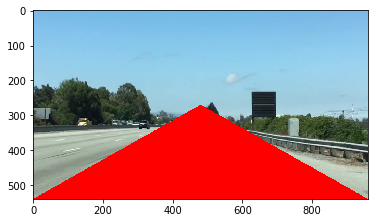

In [26]:
plt.imshow(region_select)